In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('farm_wage_data_99t22.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2[df2['DATE'].dt.month == 5]
df2 = df2[(df2['DATE'].dt.year >= 1999) & (df2['DATE'].dt.year <= 2022)]
df2['Year'] = df2['DATE'].dt.year.astype(int)
df2.drop(columns=['DATE'], inplace=True)


merged_df = pd.merge(df1, df2, on='Year')
merged_df.head()

,Year,Employment,Mean,PWHEAMTUSDM
0,1999,463360,18000,99.610331
1,2000,460700,18860,99.112047
2,2001,453050,19630,110.774167
3,2002,451140,20220,104.096405
4,2003,448005,20445,131.052411


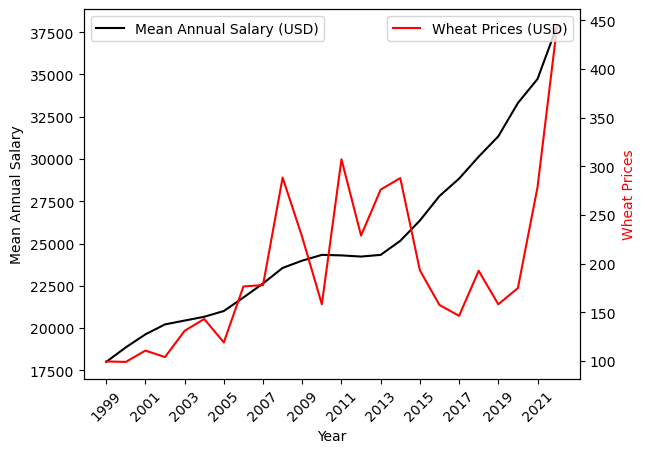

In [31]:
fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df['Year'] 
y1 = merged_df['Mean']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'black', label='Mean Annual Salary (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Annual Salary', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'red', label='Wheat Prices (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Wheat Prices', color='red')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# adjust x-axis to display every year clearly
ax1.set_xticks(x[::2])
ax1.set_xticklabels(x[::2], rotation=45)  

plt.show()

In [32]:
merged_df["Mean"].corr(merged_df["PWHEAMTUSDM"])

0.6014352631721659